<div align="right">Student Name: <b>Ashish Rawat</b><br>Student Number: <b>20343966</b><br>Subject Code: <b>CSE5ML</b></div>

<h1> Convolutional Neural Network</h1>

<p> MNIST Simple Neural Network MNIST is a dataset of handwritten digits. These digits are in the form of 28x28 grayscale images. The MNIST dataset contains 60,000 training images and an additional 10,000 test examples. </p>

## Importing Libraries ##
The first step for this project is to import all the python libraries we are going to be using. For this project we will use:

<p>tensorflow (1.15.0): to build the neural network and import dataset</p>
<p>matplotlib: to visualize the images</p>
<p>numpy: for data manipulation</p>

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist;
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import SGD

### Extract Data
### Next we are going to extract the testing and training images and label arrays from the mnist object

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# shuffle training data
#combined = list(zip(x_train, y_train))
#np.random.shuffle(combined)
#x_train[:], y_train[:] = zip(*combined)

# shuffle test data
#combined = list(zip(x_test, y_test))
#np.random.shuffle(combined)
#x_test[:], y_test[:] = zip(*combined)
x_train.shape

(60000, 28, 28)

### RESHAPE IMAGES TO 2 CHANNEL (BLACK AND WHITE)

In [56]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

### Normalize the dataset, X_TRAIN AND X_TEST

In [57]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### CHANGE Y LABELS TO CATEGORICAL (ONE HOT VECTORS)
One hot flag in the read data call, which ensures the class labels are provided in a one hot format. This means that instead of a single number specifying the class number, an array of 0s with a 1 at the class label index is used.

Ex. [3] -> [0,0,0,1.0,0,0,0,0,0,0]

In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<h2> Visualize Data</h2>
<p>visualizing some of the images in our dataset and their corresponding labels</p>

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


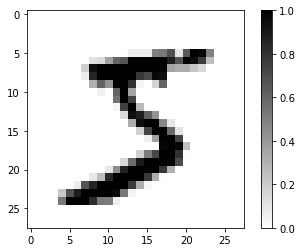

In [59]:
print(y_train[0])
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<h2>Shape of dataset</h2>
<p>Check the shape of those arrays</p>

In [60]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


<h3> MODEL 1 - SIMPLE NN MODEL USING FULLY CONNECTED DENSE LAYER ONLY </h3>
<p>Simple Plain stack of layers where each layer has exactly one input tensor and one output tensor</p>

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_74 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_75 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3246 - acc: 0.9064 - val_loss: 0.1637 - val_acc: 0.9512
Epoch 2/5
60000/60000 [==============================] - 2s

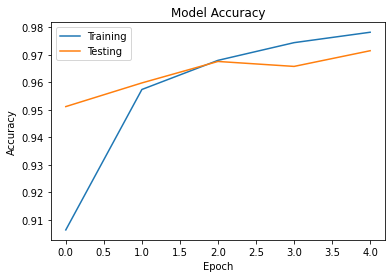

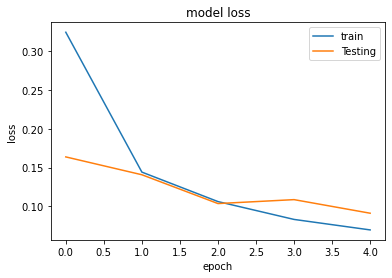

Actual Value:  6 : Predicted Value:  6


In [70]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax')) # SOFTMAX FOR OUTPUT OF NORMALIZE DISTRIBUTION
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

#EVALUATE MODEL
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=1)

print("Loss: %.2f%%, Accuracy: %.2f%%" % (val_loss * 100, val_acc * 100))

# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([ 'Training', 'Testing' ], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Testing'], loc='upper right')
plt.show()

#SAVE MODEL
model.save('num_classification_m1.h5')
new_model = load_model('num_classification_m1.h5')

#LOAD MODEL FROM SAVED MODEL 
predictions = new_model.predict([ x_test ])
print("Actual Value: ", np.argmax(y_test[1400]), ": Predicted Value: ", np.argmax(predictions[1400]))

<h3>MODEL 2</h3>
<p>Convolutional layer model with 'rmsprop' optimizer</p>

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
dense_31 (Dense)             (None, 2, 2, 128)         4224      
_________________________________________________________________
dense_32 (Dense)             (None, 2, 2, 128)         16512     
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)             

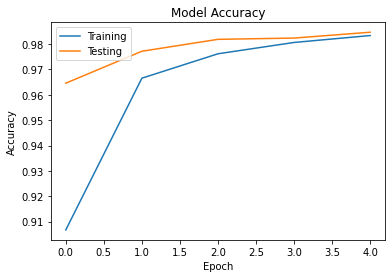

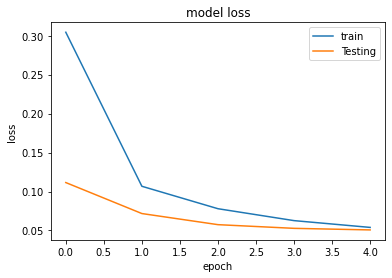

Actual Value:  6 : Predicted Value:  6


In [37]:
model = Sequential()
#16 filters of 3x3 blocks
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

#Reduce spatial dimentionality
model.add(MaxPooling2D())

#REPEAT LAYERS
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
#FLatten Layer
model.add(Flatten())

#FINAL LAYER OF OUTPUT
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=60)

#EVALUATE MODEL
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)
print("Loss: %.2f%%, Accuracy: %.2f%%" % (val_loss * 100, val_acc * 100))

# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([ 'Training', 'Testing' ], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Testing'], loc='upper right')
plt.show()

#SAVE MODEL
model.save('num_classification_m2.h5')
new_model = load_model('num_classification_m2.h5')

#LOAD MODEL FROM SAVED MODEL 
predictions = new_model.predict([ x_test ])
print("Actual Value: ", np.argmax(y_test[1400]), ": Predicted Value: ", np.argmax(predictions[1400]))

<h3> MODEL 3</h3>
<p>Dense Convolutional layer model with 'sgd' (Stochastic gradient descent) optimizer (customize learning rate parameter and momentum) and dropout filter</p>

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dense_106 (Dense)            (None, 3, 3, 128)       

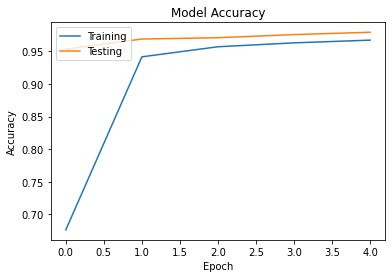

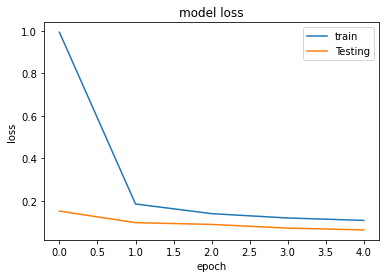

Actual Value:  6 : Predicted Value:  6


In [86]:
model = Sequential()
#16 filters of 3x3 blocks

model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
#Reduce spatial dimentionality
model.add(MaxPooling2D())

#REPEAT LAYERS
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D())

#REPEAT LAYERS
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

#FLatten Layer to flatten
model.add(Flatten())

#ADD DROPOUT of 50% percent to prevent overfitting
model.add(Dropout(0.5))

#FINAL LAYER OF OUTPUT
model.add(Dense(10, activation='softmax'))

epochs = 5
lrate = 0.002
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)

#EVALUATE MODEL
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=1)
print("Loss: %.2f%%, Accuracy: %.2f%%" % (val_loss * 100, val_acc * 100))

# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([ 'Training', 'Testing' ], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Testing'], loc='upper right')
plt.show()

#SAVE MODEL
model.save('num_classification_m3.h5')
new_model = load_model('num_classification_m3.h5')

#LOAD MODEL FROM SAVED MODEL 
predictions = new_model.predict([ x_test ])
print("Actual Value: ", np.argmax(y_test[1400]), ": Predicted Value: ", np.argmax(predictions[1400]))